In [1]:
from torchvision import datasets, tv_tensors, transforms
from torchvision.transforms import v2 as TF
import pathlib
from helpers.visualise import plot

In [2]:
ROOT = pathlib.Path("../data")

In [3]:
dataset = datasets.WIDERFace(
    root=ROOT,
    split="train",
)

dataset = datasets.wrap_dataset_for_transforms_v2(dataset, target_keys=["bbox"])

In [4]:
sample = dataset[0]

sample_img, sample_ann = sample

In [5]:
sample

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1385>,
 {'bbox': BoundingBoxes([[449, 330, 571, 479]], format=BoundingBoxFormat.XYXY, canvas_size=(1385, 1024))})

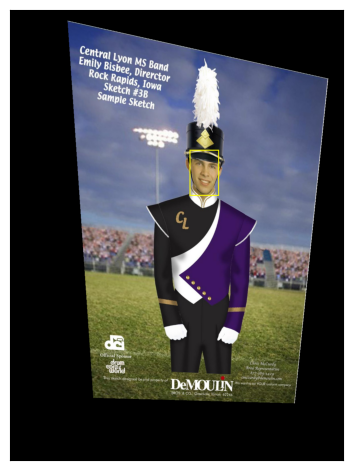

In [6]:
perspective_transform = TF.Compose(
    [
        TF.RandomPerspective(p=1.0),
    ],
)

new_sample = perspective_transform(sample_img, sample_ann)

plot([new_sample])


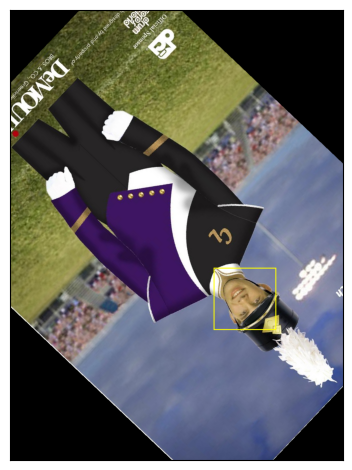

In [7]:
rotate_transform = TF.Compose(
    [
        TF.RandomRotation(degrees=180),
    ],
)

new_sample = rotate_transform(sample_img, sample_ann)

plot([new_sample])

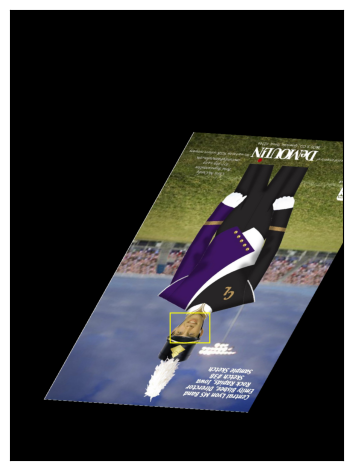

In [8]:
affine_transform = TF.Compose(
    [
        TF.RandomAffine(degrees=180, translate=(0.2, 0.2), scale=(0.5, 1.5), shear=30),
    ],
)

new_sample = affine_transform(sample_img, sample_ann)

plot([new_sample])

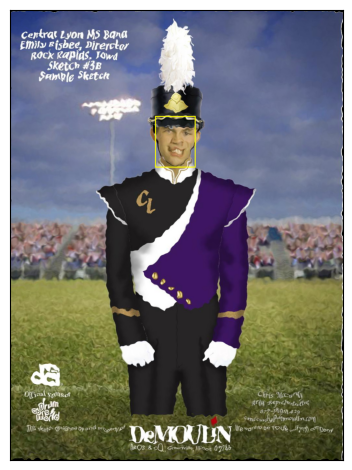

In [9]:
elastic_transform = TF.Compose(
    [
        TF.ElasticTransform(alpha=120.0),
    ],
)

new_sample = elastic_transform(sample_img, sample_ann)

plot([new_sample])

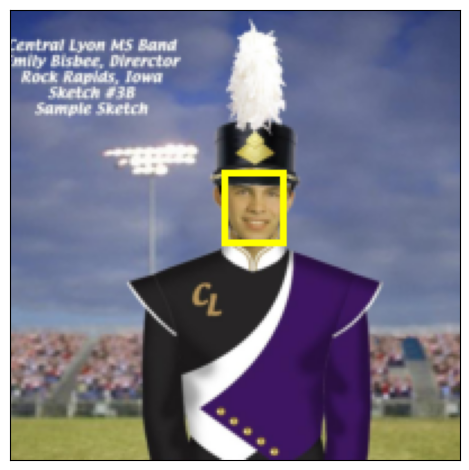

In [10]:
resized_crop_transform = TF.Compose(
    [
        TF.RandomResizedCrop(size=(200, 200), scale=(0.5, 1.0)),
    ],
)

new_sample = resized_crop_transform(sample_img, sample_ann)

plot([new_sample])

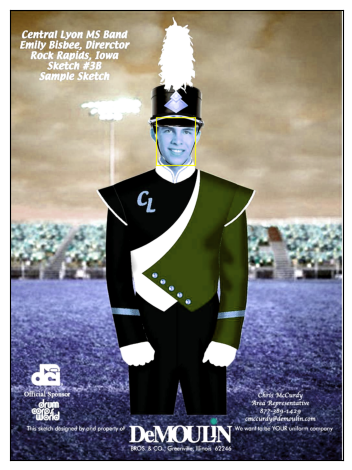

In [11]:
color_jitter_transform = TF.Compose(
    [
        TF.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
    ],
)

new_sample = color_jitter_transform(sample_img, sample_ann)

plot([new_sample])

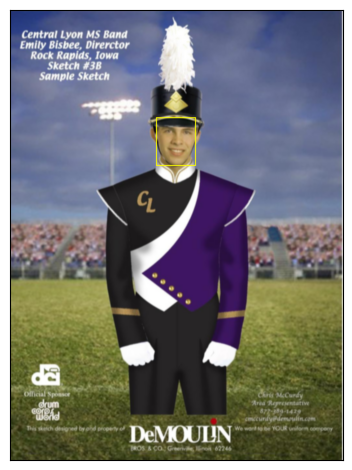

In [12]:
gaussian_transform = TF.Compose(
    [
        TF.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.0)),
    ],
)

new_sample = gaussian_transform(sample_img, sample_ann)

plot([new_sample])

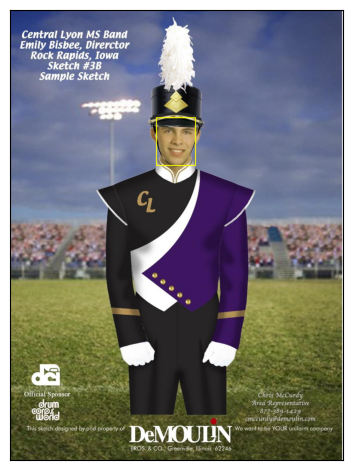

In [13]:
posterize_transform = TF.Compose(
    [
        TF.RandomPosterize(bits=4),
    ],
)

new_sample = posterize_transform(sample_img, sample_ann)

plot([new_sample])

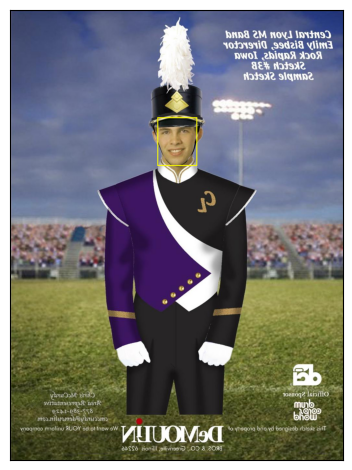

In [14]:
flip = TF.Compose(
    [
        TF.RandomHorizontalFlip(p=1.0),
    ],
)

new_sample = flip(sample_img, sample_ann)

plot([new_sample])

/Users/danielng/opt/anaconda3/envs/IPPRProject/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


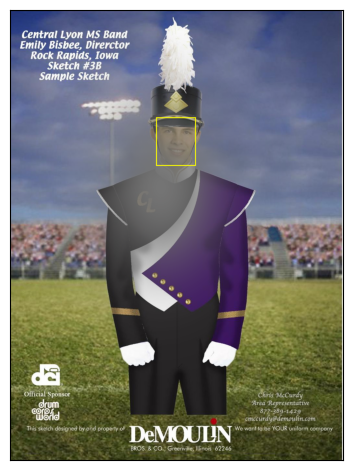

In [15]:
from custom_transform.glare import Glare

glare_transform = TF.Compose(
    [
        Glare(),
    ],
)

new_sample = glare_transform(sample_img, sample_ann)

plot([new_sample])

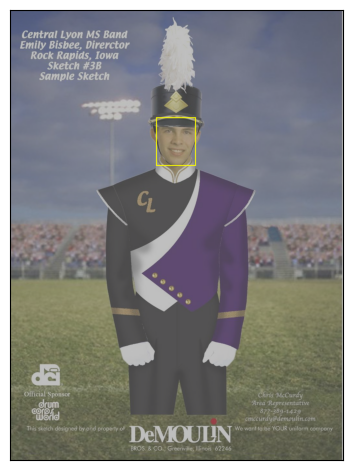

In [16]:
from custom_transform.overlay import Overlay

lens_smear_transform = TF.Compose(
    [
        Overlay(alpha=0.5),
    ],
)

new_sample = lens_smear_transform(sample_img, sample_ann)

plot([new_sample])

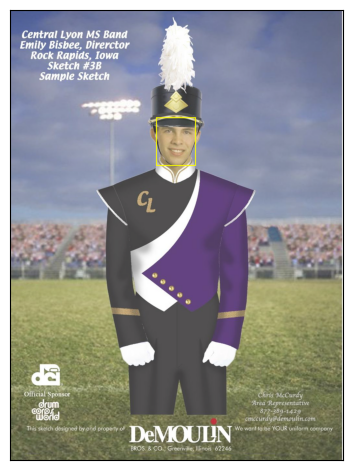

In [17]:
fog_overlay_transform = TF.Compose(
    [
        Overlay(color=255, alpha=0.2)
    ]
)

new_sample = fog_overlay_transform(sample_img, sample_ann)

plot([new_sample])